# 4. Методы сэмплирования

В этом небольшом домашнем задании мы попробуем улучшить метод Шерлока Холмса. Как известно, в рассказе The Adventure of the Dancing Men великий сыщик расшифровал загадочные письмена.
Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее.
В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски.


In [1]:
import re
from collections import Counter
import random
import matplotlib.pyplot as plt
import numpy as np 
from tqdm import tqdm
import numpy as np 
%matplotlib inline

## 1.

Реализуйте базовый частотный метод по Шерлоку Холмсу:
* подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
* возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе совсем вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
* расшифруйте их таким частотным методом.


In [2]:
def read_data(path):
    with open(path, encoding='utf-8') as f:
        names = f.read().replace('\n', ' ')
        return names
    
AnnaKarenina = read_data('corpora/AnnaKarenina.txt')
WarAndPeace = read_data('corpora/WarAndPeace.txt')
WarAndPeaceEng = read_data('corpora/WarAndPeaceEng.txt')

# оставим цифры, хотя они и могут испортить статистикку
AnnaKarenina = re.sub('\W+',' ', AnnaKarenina ).lower()
WarAndPeace = re.sub('\W+',' ', WarAndPeace ).lower()
WarAndPeaceEng = re.sub('\W+',' ', WarAndPeaceEng ).lower()

In [3]:
#  получить отсортированный словарь частотности символов
def get_sorted_frequency_dict(text):
    counts = dict(Counter(text)) 
    counts = {k: v / len(text) for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}        
    return counts

# словарь для шифровки случайными перестановками символов
def get_encode_dict(text):
    freq_dict = get_sorted_frequency_dict(text)
    shuffled_letters = list(freq_dict.keys())
    random.shuffle(shuffled_letters)
    return {list(freq_dict.keys())[i]:shuffled_letters[i] for i in range(len(shuffled_letters))}

# словарь для дешифровки по отссортированному списку частотных символов
def get_decode_dict(text, freq_letters_list):
    freq_dict = get_sorted_frequency_dict(text)
    decode_dict = {list(freq_dict.keys())[i]:freq_letters_list[i] for i in range(min(len(freq_dict),len(freq_letters_list)))}
    return decode_dict

def encode(text):
    encode_dict = get_encode_dict(text)
    return ''.join([encode_dict[i] for i in text])

def decode(text, freq_dict):
    decode_dict = get_decode_dict(text, freq_dict)
    return ''.join([decode_dict[i] if i in decode_dict.keys() else '?' for i in text])

# отсортированные по частотности символы только из Русского языка
def get_only_rus_letters(frequency_dict):
    return [' '] + [i for i in list(frequency_dict.keys()) if i in 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя']

#
def accuracy(original, decoded):
    return sum([1 for i in range(len(original)) if original[i] == decoded[i]]) / len(original)

In [4]:
AnnaKarenina_frequency_dict =  get_sorted_frequency_dict(AnnaKarenina)
WarAndPeace_frequency_dict = get_sorted_frequency_dict(WarAndPeace)

#### Отсортированный словарь частотности символов Анны Корениной

In [5]:
AnnaKarenina_frequency_dict

{' ': 0.16759116836318097,
 'о': 0.09513034595302555,
 'е': 0.07242743491488532,
 'а': 0.06859314466860275,
 'н': 0.05748448067215471,
 'и': 0.05498627598220739,
 'т': 0.04957691600291936,
 'с': 0.044003547274936064,
 'л': 0.04153755858919674,
 'в': 0.038988394038047686,
 'р': 0.032971030197525106,
 'к': 0.028385228434899656,
 'д': 0.024385757948859728,
 'м': 0.02373850913704454,
 'у': 0.022333891353575917,
 'п': 0.019969822390240075,
 'я': 0.01783243694742231,
 'ь': 0.016314770276460177,
 'ы': 0.015354733351061899,
 'г': 0.01504955992938252,
 'б': 0.01447845803660441,
 'ч': 0.013974716879897564,
 'з': 0.01354302242351042,
 'ж': 0.009383643407492622,
 'й': 0.008705350082531545,
 'ш': 0.007068777068765354,
 'х': 0.006435000404164416,
 'ю': 0.005161589619651997,
 'э': 0.002939856820362389,
 'щ': 0.0023746123828948247,
 'ц': 0.002338881905500502,
 'ф': 0.0010432127908080126,
 '1': 0.0004539527865672149,
 'e': 0.00043169445638714497,
 'i': 0.00043110871085609055,
 'a': 0.000290529783403017

#### Отсортированные по частотности символы только из Русского, поситанные на "Войне и мире"

In [6]:
get_only_rus_letters(WarAndPeace_frequency_dict)

[' ',
 'о',
 'а',
 'е',
 'и',
 'н',
 'т',
 'с',
 'л',
 'в',
 'р',
 'к',
 'д',
 'м',
 'у',
 'п',
 'я',
 'г',
 'ь',
 'ы',
 'з',
 'б',
 'ч',
 'й',
 'ж',
 'ш',
 'х',
 'ю',
 'ц',
 'э',
 'щ',
 'ф',
 'ё',
 'ъ']

В Анне Карениной и Войне и мире "а" и "е" имеют разные позиции по частотности!

#### Зашифруем Анну Коренину

In [7]:
encoded = encode(AnnaKarenina)
encoded[:1000]

'eрр7rerж7рuýъъýuoýз ъаъýuеsаъuаїuвýifщuїъýi ъаbfщuзеiýъеqum8qýubеmвbеèеuъýxаъý bв5uвbýqн ьuýюезаїiеiuюзýїеьuqв uвxýвbmаqf uв i8аuàещеtаusзcèuъýusзcèýuoýtsý5uъ вxýвbmаqý5uв i85uъ вxýвbmаqýuàеuвqе icunbеuoъаèýuеuq xъfщuц ъъевb5щuеumóvqаuеuq з uеuв i8 uеux mеq x вoеiusевbеаъвbq um qubеmвbеьзеiýъuназеoеèеusfщýъа5uxýвb8uà зqý5жum qubеmвbеьuýъъýuoýз ъаъýuзеiýъuназеoеèеusfщýъа5uýъъýuoýз ъаъýuàезýїаmýuвеqз i ъъаoеquqв sъ qъевb8óuвеs зtýъа5uъ еvfxýьъý5uвqеvеsýuзýвoеqýъъевb8uàеq вbqеqýъа5ucsаqаb m8ъеuвеx býmав8uqunbеiuзеiýъ uвuц m8ъевb8óuщcsеt вbq ъъеèеuqїèm5sýuýqbезýuъýutаїъ8uеъuqfвbcàýmuїs в8uoýouщcsеtъаouаuifвmаb m8uаuъýїъýx ъа uавocввbqýuqаs muъ uqubеiuxbеvfuъ евàезаiеuзýїз наb8uqеàзевuýuqubеiuxbеvfuїýвbýqаb8umóvаb8utаїъ8uquv вxавm ъъfщuъаoеèsýuъ uавbеäаifщuqв щu  uàзе5qm ъа5щulёuё11uёuquh1u uèеsfuеsаъuiýвbаbfьuàавýb m8uàеuqаsаiеicuèеъxýзеquвoýїýmusевbе qвoеicunbеuq ä8uъ вmfщýъъý5unbеuq ä8uà зqý5uobеucuъýвuаїuàавýb m ьuiеt buàезýqъ5b8в5uвunbаiuýuqu qзеà uobеuàз sвbýqаbuщеb8uxbеuъаvcs8uàеsеv

#### Расшифруем Анну Коренину

In [8]:
AnnaKarenina_frequency_dict =  get_sorted_frequency_dict(AnnaKarenina)
decoded = decode(encoded, list(AnnaKarenina_frequency_dict.keys()))
print(decoded[:1000])

print(f"\n\n Accuracy: {accuracy(AnnaKarenina, decoded)}")

annotation анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть перваяi лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях 61 100 1 в 70 е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобн

Расшифруем Анну Коренину, зная только отсортированный по частотности список русских букв в "Войне и Мире". Анна Коренина - тестовый текст, Война и Мир - тренировочный

#### Расшифруем зная частотности по ограниченному размеру текста

In [9]:
encoded = encode(AnnaKarenina)
encoded[:1000]

'сjjwкскáwjїmîîmїýmя î2îmїkё2îї2бїàmdèqїбîmd î2uèqїяkdmîkвїhzвmїukhàukйkїîmç2îm uàюїàumвx äїmpkя2бdkdїpяmбkäївà їàçmàuh2вè їà dz2ї6kqkн2їёя9йїîmїёя9йmїýmнёmюїî àçmàuh2вmюїà dzюїî àçmàuh2вmї6kїàвk d9ї7ukїýî2йmїkїв çîèqїr îîkàuюqїkїh1êв2їkїв я їkїà dz їkїç hkв ç àýkdїёkàuk2îàuв їh вїukhàukäяkdmîїx2яkýkйkїёèqmî2юїçmàuzї6 явmюáїh вїukhàukäїmîîmїýmя î2îmїяkdmîїx2яkýkйkїёèqmî2юїmîîmїýmя î2îmї6kяmб2hmїàkвя d îî2ýkвївà ёî вîkàuz1їàkё янmî2юїî kêèçmäîmюїàвkêkёmїяmàýkвmîîkàuzї6kв àuвkвmî2юї9ё2в2u hzîkїàkç umh2àzївї7ukdїяkdmî їàїr hzîkàuz1їq9ёkн àuв îîkйkївбйhюёmїmвukяmїîmїн2бîzїkîївèàu96mhїбё àzїýmýїq9ёkнî2ýї2їdèàh2u hzї2їîmбîmç î2 ї2àý9ààuвmїв2ё hїî ївїukdїçukêèїî kà6kя2dkїяmбя x2uzївk6яkàїmївїukdїçukêèїбmàumв2uzїh1ê2uzїн2бîzївїê àç2àh îîèqїî2ýkйёmїî ї2àuke2dèqївà qї  ї6яkювh î2юqїжéїéттїéївїcтї їйkёèїkё2îїdmàu2uèäї62àmu hzї6kїв2ё2dkd9їйkîçmяkвїàýmбmhїёkàuk вàýkd9ї7ukїв ezїî àhèqmîîmюї7ukїв ezї6 явmюїýukї9їîmàї2бї62àmu h äїdkн uї6kяmвîюuzàюїàї7u2dїmївї вяk6 їýukї6я ёàumв2uїqkuzїçukїî2ê9ёzї6kёkê

In [10]:
russian_freq_dict =  get_only_rus_letters(get_sorted_frequency_dict(WarAndPeace))
decoded = decode(encoded, russian_freq_dict)
print(decoded[:1000])


print(f"\n\n Accuracy: {accuracy(AnnaKarenina, decoded)}")

?????????? еиие кераиние одни нч семьх чиемаинтьх ромеиов лгве толстоыо иебниеатся стевшаж ефорнчмом фречож вса сбестлнвьа самгн похойн друы ие друые кейдея иасбестлнвея самгя иасбестлнве по своаму цто киные о вабиьх щаииостях о люзвн о вара о самга о баловабаском достониства лав толстожромеи шнрокоыо дьхеиня бестг парвея? лав толстож еиие кераиние ромеи шнрокоыо дьхеиня еиие кераиние поречнле соврамаиинков всадиавиостгю содарйеиня иаозьбежиея свозоде ресковеииостг поваствовеиня уднвнталгио собателнсг в цтом ромеиа с щалгиостгю худойастваииоыо вчыляде евторе ие йнчиг ои вьступел чдасг кек худойинк н мьслнталг н иечиебаина нскусстве вндал иа в том бтозь иаоспорнмо речрашнтг вопрос е в том бтозь честевнтг люзнтг йнчиг в засбнслаииьх инкоыде иа нстоэнмьх всах аа проявлаинях ?ё ё?? ё в ?? а ыодь одни местнтьж пнсеталг по внднмому ыоиберов скечел достоавскому цто ваэг иасльхеииея цто ваэг парвея кто у иес нч пнсеталаж мойат поревиятгся с цтнм е в авропа кто прадстевнт хотг бто инзудг подози

#### Зависимость точности расшифровки от размера (в символах) обучающего текста 

100%|██████████████████████████████████████████████████████████████████████████████████| 68/68 [00:53<00:00,  1.26it/s]


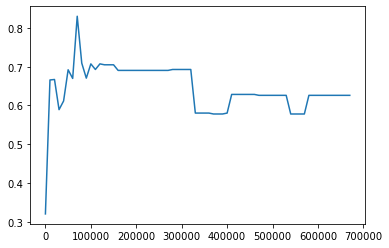

In [11]:
from tqdm import tqdm
accs = []
train_sizes = []
for i in tqdm(range(100, len(WarAndPeace), 10000)):
    
    russian_freq_dict =  get_only_rus_letters(get_sorted_frequency_dict(WarAndPeace[:i]))
    decoded = decode(encoded, russian_freq_dict)
    accs.append(accuracy(AnnaKarenina, decoded))
    train_sizes.append(i)
                
plt.plot(train_sizes, accs)
    

Частотности русских букв меняются!

Посмотрим как расшифровка выглядит на максимальной точности.

In [12]:
russian_freq_dict =  get_only_rus_letters(get_sorted_frequency_dict(WarAndPeace[:train_sizes[np.argmax(accs)]]))
decoded = decode(encoded, russian_freq_dict)
print(decoded[:1000])


print(f"\n\n Accuracy: {accuracy(AnnaKarenina, decoded)}")

?????????? анна каренина омин ич сапгх чнапенитгх ропанов льва толстоыо набинается ставшеж афоричпоп фрачож все сбастливге сепьи дохойи мруы на мруыа каймая несбастливая сепья несбастлива до своепу цто книыа о вебнгх эенностях о люзви о вере о сепье о беловебескоп мостоинстве лев толстожропан широкоыо мгхания басть дервая? лев толстож анна каренина ропан широкоыо мгхания анна каренина дорачила соврепенников всемневностью сомерйания неозгбажная свозома раскованность довествования умивительно собетались в цтоп ропане с эельностью хумойественноыо вчыляма автора на йичнь он вгстудал чмесь как хумойник и пгслитель и начнабение искусства вимел не в топ бтозг неосдорипо рачрешить водрос а в топ бтозг частавить люзить йичнь в зесбисленнгх никоыма не истощипгх всех ее дроявлениях ?ё ё?? ё в ?? е ыомг омин паститгж дисатель до вимипопу ыонбаров скачал мостоевскопу цто вещь неслгханная цто вещь дервая кто у нас ич дисатележ пойет доравняться с цтип а в евроде кто дремставит хоть бто низумь домозн

a и е на своих местах.

## 2.
Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
проведите тестирование аналогично п.1, но при помощи биграмм.


In [13]:
#  получить отсортированный словарь частотности символов
def get_sorted_frequency_bigrams_dict(text):
    counts = Counter()
    for i in range(0, len(text) - 1):
        counts[text[i:i + 2]] += 1
    count_sum = sum(counts.values())
    counts = dict(counts) 
    counts = {k: v / count_sum for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True )}        
    return counts

# словарь для шифровки случайными перестановками символов
def get_encode_bigrams_dict(text):
    freq_dict = get_sorted_frequency_bigrams_dict(text)
    shuffled_letters = list(freq_dict.keys())
    random.shuffle(shuffled_letters)
    return {list(freq_dict.keys())[i]:shuffled_letters[i] for i in range(len(shuffled_letters))}

# словарь для дешифровки по отссортированному списку частотных символов
def get_decode_bigrams_dict(text, freq_letters_list):
    freq_dict = get_sorted_frequency_bigrams_dict(text)
    decode_dict = {list(freq_dict.keys())[i]:freq_letters_list[i] for i in range(min(len(freq_dict),len(freq_letters_list)))}
    return decode_dict

def encode_bigrams(text):
    encode_dict = get_encode_bigrams_dict(text)
    return ''.join([encode_dict[text[i:i+2]] for i in range(0, len(text) - 1)])

def decode_bigrams(text, freq_dict):
    decode_dict = get_decode_bigrams_dict(text, freq_dict)
    return ''.join([decode_dict[text[i:i+2]] if text[i:i+2] in decode_dict.keys() else '??' for i in range(0, len(text) - 1)])

# # отсортированные по частотности символы только из Русского языка
# def get_only_rus_letters(frequency_dict):
#     return [i for i in list(frequency_dict.keys()) if i in 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя']

# #
def accuracy(original, decoded):
    return sum([1 for i in range(len(original)) if original[i]==decoded[i]]) / len(original)

#### Зашифруем Анну Коренину

In [14]:
encoded = encode_bigrams(AnnaKarenina)
encoded[:1000]

'убвпgo37su10яз6  cзыфюурянфях óлпкц ifхвчьбшфях втао абшà pt53ущn  xъюwiêtшрамgeфяъюп хвчьak nêtшрьчллпаё ур40ça5 меэтséшкх afghkfгизшghahцбáллжфябтягбшфяueзчжцюмrhn зшгфbrk 63 ёиффюuo é фсё53кшяiпарlачвхжчejшлeaифskсшми11n ib ж99зштпpyйб69бь11n мимфguркетчуneriз жьныетomясétjotéлжфях omясétjoмшх óлпк уulщнтhrhлждмзсib ж99зштпpyйбшктhrhn мимфguлшrhлждмзсib ж99зштпpyйбшкх чуneáлn llciспмф68ккблбжgháлóлекчьfuмшх втáлskz кнлт15êtшрлщ94хвян40йфзшуфшошрвтáлмелцrlялсжетвтáлskz èrif11втáлn мимфguбв11втáлweсвсфгоçaz кнсвзс4 ждпарlomвуйфзшgh54бшчшзшmez 11меяммя5 afghkfгизшgheaapллпаё урà вщядcuллhtждahцбáлomаlêtшьурчьнрrhwe ж99зшоу97чуяшèrhéшктhggosмеяммя5 afghkfгизшgheaиффюурянфях óлпкц ifхвчьбшфях ьчллпаё урà вщядcuллhtждahцбáлomаlêtшьурчьнрrhфюурянфях óлпкц ifхвчьбшфях чуne фжчejзехтпюх n эпçafeifмфп хвянчьыгждça5 skсшмидкиддммяшн40йфзшоувьрфn эпао ýèrsm82урчьнрrhлждмтóижvaац жropaфятhrhn llciижукаощнх ьчжч994 ждçaшкурян40йфзшоу97чуneçaz зсзшmeciçaшкурчьнрrh âрж айбсжakpóсфэт ç40áлn эпitсвз

#### Расшифруем Анну Коренину обучив частотности на Войне и Мире

In [15]:
decoded = decode_bigrams(encoded, list(get_sorted_frequency_bigrams_dict(WarAndPeace).keys()))
print(decoded[:1000])

print(f"\n\n Accuracy: {accuracy(AnnaKarenina, decoded)}")

тзрздг????????ык????дц??????17ми????????эттчлеteарбъ ксте рьравы бanсиalтебмонят т??н ré ксте сля охe нусе юн ецаныеь дкайacnn?? пмиблrmуг??to??mi xоеkrчтлжечch клшугtrиеаюонят тmyимpaль??mi xоеаhчевъновыазkyгрыслеuiпобкенмюомспая?? льк????лияде  mл  э озмелихлдщрнааф оquетр ового нои ас кcrищзж aлщн ré кrçрсduав яиб 2меия иun птьнаектаecдрkopazot ржжаебво фэт??пчнпба??в нцти??ай??êcudтваvазийу aerlтгч aлкоntег??imçoад звоау намсоouмосыа  p пalén 5есьцивeiнаl r  щт лфрыvaвшktипшта  p пспмоuéой??????o ?? сцетоотка??ртvsпаесд ян sсё снкроmtыйацыв 1фаяш é??и ас ксте суроmtыйацыв 1фа??рхкёе рьравы башыс??da?? еуэусьс ицаи  валуювсazén 5есьцивeiнаl r  щт лфрын лиu усьс иun пспмоuéой????hrgiьф ицаи  валуювсazén 5есьцивeiнаl r  щт лфрын лияде кутоотка rо  ш пагтсофосеюикkiойдъязепло??муактуех олао siраweйтev т??jaоархкёе сля гко лу нвдитврpe??cu??крbumi xоеъекчlrзю??оншеарахподм гзннаèmag??ьечэоещая гко сшаявмрюèsрщ??пэs ем?? сбея гко лу нвдитi одрттеdzа убя гко  ш пспмоuéой??????рзuxа убя гк

Метрика сильно хуже, словарь вырос квадратично

## 3.
Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
реализуйте и протестируйте его, убедитесь, что результаты улучшились.


Текст можно рассмвтривать как цепь Маркова, тк следующий символ (символы=состояния) зависит от предудущего. 
Для расшифровки Анны Карениной обучим матрицу переходов между символами на "Войне и Мире".

Воспользуемся идеей MCMC-семплирования. Во множестве попыток меняем местами пару символов в текущей перестановке, считаем правдоподобие восстановления текста из текущей пререстановки, принимаем новую перестнаовку с определённой вероятностью. Выберем лучшую попытку.

In [16]:
rus_cahracters = ' абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
WarAndPeace_rus_only = ''.join([i for i in WarAndPeace if i in rus_cahracters])
AnnaKarenina_rus_only = ''.join([i for i in AnnaKarenina if i in rus_cahracters])
emdedings = {c: i for i, c in enumerate(rus_cahracters)}

In [17]:
# build transition matrix base on train text
def get_transitions_matrix(text, matrix_of_transitions):
    for i in range(len(text)-1):
        matrix_of_transitions[emdedings[text[i]], emdedings[text[i+1]]] += 1
    matrix_of_transitions = np.clip(matrix_of_transitions, 1, None)
    matrix_of_transitions = (np.log(matrix_of_transitions).T - np.log(matrix_of_transitions.sum(axis=1))).T
    return matrix_of_transitions


def calculate_log_likelihood(text, permutation):
    text = text.translate(str.maketrans(rus_cahracters, ''.join(permutation)))
    return sum([matrix_of_transitions[emdedings[text[i]], emdedings[text[i+1]]] for i in range(len(text) - 1)])

def decode_mcmc(text, iterations):
    permutation = np.array(list(rus_cahracters))
    random.shuffle(permutation)
    log_likelihood = calculate_log_likelihood(text, permutation)
    log_likelihood_best = log_likelihood
    permutation_best = permutation.copy()
    
    for i in tqdm(range(iterations)):
        swap = random.sample(range(len(rus_cahracters)), 2)
        permutation[swap[0]], permutation[swap[1]] = permutation[swap[1]], permutation[swap[0]]
        log_likelihood_new = calculate_log_likelihood(text, permutation)
        if log_likelihood_new >= log_likelihood:
            log_likelihood = log_likelihood_new
            if log_likelihood_new > log_likelihood_best:
                log_likelihood_best = log_likelihood_new
                permutation_best = permutation.copy()
        else:
            if random.random() < np.exp(log_likelihood_new - log_likelihood):
                log_likelihood = log_likelihood_new
            else:
                permutation[swap[0]], permutation[swap[1]] = permutation[swap[1]], permutation[swap[0]]
    return text.translate(str.maketrans(rus_cahracters, ''.join(permutation_best)))

In [18]:
encoded = encode(AnnaKarenina_rus_only)[:1000]
encoded

'чднндчедёанзндчрйзнчзвчшдуьъчвндуанз ьъчёруднрфчягфдч ряш рлрчндпзнда шщчш дфтацчдюрёзвуручюёдврцчфшачшпдш язфьачшаугзчбръркзчйёмлчндчйёмлдчедкйдщчнашпдш язфдщчшаугщчнашпдш язфдчбрчшфраумчо рчензлдчрчфапньъчианнрш щъчрчясжфзчрчфаёачрчшаугачрчпаярфапашеручйрш рзнш фачяафч ряш рцёруднчтзёрерлрчйьъднзщчпдш гчбаёфдщчяафч ряш рцчднндчедёанзндчёруднчтзёрерлрчйьъднзщчднндчедёанзндчбрёдвзядчшрфёауаннзерфчфшайнафнрш гсчшрйаёкднзщчнаржьпдцндщчшфржрйдчёдшерфдннрш гчбрфаш фрфднзщчмйзфз аягнрчшрпа дязшгчфчо ручёрудначшчиаягнрш гсчъмйркаш фаннрлрчфвлящйдчдф рёдчндчкзвнгчрнчфьш мбдячвйашгчедечъмйркнзечзчуьшяз аягчзчндвндпанзачзшемшш фдчфзйаячначфч ручп ржьчнаршбрёзурчёдвёатз гчфрбёршчдчфч ручп ржьчвдш дфз гчясжз гчкзвнгчфчжашпзшяанньъчнзерлйдчначзш рэзуьъчфшаъчаачбёрщфяанзщъччччфччачлрйьчрйзнчудш з ьцчбзшд аягчбрчфзйзурумчлрнпдёрфчшедвдячйрш рафшерумчо рчфаэгчнашяьъднндщчо рчфаэгчбаёфдщче рчмчндшчзвчбзшд аяацчурка чбрёдфнщ гшщчшчо зучдчфчафёрбаче рчбёайш дфз чър гчп рчнзжмйгчбрйржнраччючучйрш рафшез

In [19]:
matrix_of_transitions = get_transitions_matrix(WarAndPeace_rus_only, np.zeros((len(emdedings), len(emdedings))))
decoded = decode_mcmc(encoded, 50000)
decoded

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:33<00:00, 1489.92it/s]


' анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива по своему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыхания часть первая лев толстой анна каренина роман широкого дыхания анна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях    в  е годы один маститый писатель по видимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть что нибудь подобное  ф м достоевски

In [20]:
print(f"\n\n Accuracy: {accuracy(AnnaKarenina_rus_only[:1000], decoded)}")



 Accuracy: 1.0


## 4.
Расшифруйте сообщение:
←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

Или это (они одинаковые, но сообщали о проблемах с юникодом):
დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ



In [37]:
message = '←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'
encoded_cahracters = ''.join(set(message))
print(len(set(encoded_cahracters)))

28


Предположим, что в сообщении зашифрован русский текст

In [38]:
rus_top_frequent_chars = ''.join(get_only_rus_letters(WarAndPeace_frequency_dict)[:len(set(message))])
rus_top_frequent_chars

' оаеинтслвркдмупягьызбчйжшхю'

In [39]:
matrix_of_transitions = get_transitions_matrix(WarAndPeace_rus_only, np.zeros((len(emdedings), len(emdedings))))

In [40]:
switch_to_russian = str.maketrans(encoded_cahracters, rus_top_frequent_chars)
message = message.translate(switch_to_russian)
message

' хвнкшюкшнпнд кысртзвоыюакнвнкьслднкысртзвоыюакд бхдкякчдсйскхссмж ынукбсдсрюакв йбскьрслндздокхбср  кшх йскшюкшх кхп взвнкьрзшнвоыскнкьсвялнд ктзбхнтзвоыюакмзввкгзкьсхв пы  кл дш рдс кгзпзын кбярхзкисдукбсы лыскукынл йскы ксм жзе'

In [41]:
decoded = decode_mcmc(message, 800000)
decoded

100%|████████████████████████████████████████████████████████████████████████| 800000/800000 [02:23<00:00, 5561.90it/s]


'если вы вимите норкальный или почти норкальный тедст у этого сообщения доторый легдо прочитать сдорее всего вы все смелали правильно и получите кадсикальный балл за послемнее четвертое замание дурса хотя донечно я ничего не обещаж'

за кадсикальный балл спасибо!

## 6.

Бонус: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

В работе с сигналами (различной природы) данные модели могут пригодиться для восстановления потерянной информации.

Уже сейчас можно дерзнуть и расшифровать азбуку Морзе например